<a href="https://colab.research.google.com/github/fayzankj/codercave-may/blob/main/goldentask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing necessary libraries
!pip install pandas numpy nltk scikit-learn


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


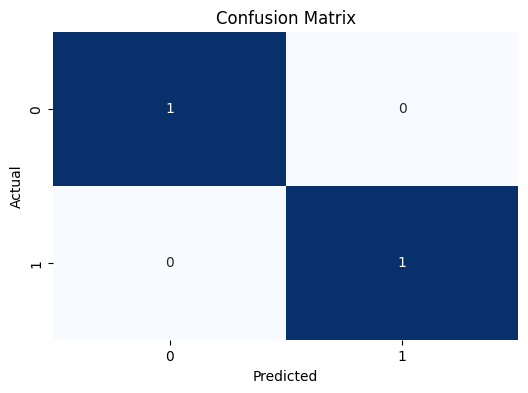

<ipython-input-5-197ac2893550>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


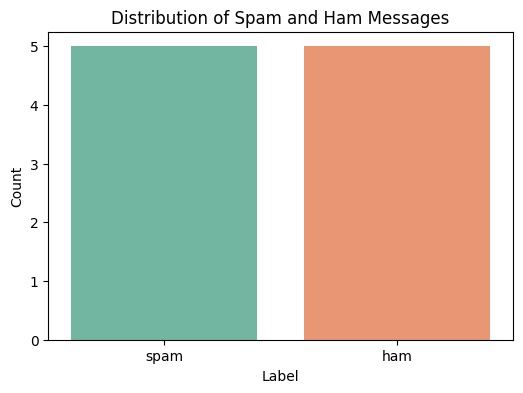

In [5]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Example dataset
data = {
    'text': [
        'Free money!!! Click here to claim your prize',
        'Hi, how are you doing today?',
        'Win a free car! Limited offer, click now!',
        'Hello friend, long time no see!',
        'Get your mortgage approved in minutes',
        'Can we meet tomorrow?',
        'You have been selected for a $1000 gift card',
        "Let's catch up this weekend",
        'Congratulations! You won a free vacation',
        'What time is the meeting today?'
    ],
    'label': ['spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham']
}
df = pd.DataFrame(data)

# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the distribution of spam and ham messages
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
